# K-Nearest step by step

## Load dataset

In [33]:
# I decided to go with the breast cancer dataset
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
from sklearn.datasets import load_breast_cancer

## Features and classes

##### Features are computed from a digitized image of a fine needle aspirate of a breast mass. They describe characteristics of the cell nuclei present in the image.
a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness (perimeter^2 / area - 1.0) 

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

**The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features:**


- 1 - mean radius
- 2 - mean texture
- 3 - mean perimeter
- 4 - mean area
- 5 - mean smoothness
- 6 - mean compactness
- 7 - mean concavity
- 8 - mean concave points
- 9 - mean symmetry
- 10 - mean fractal dimension
- 11 - radius error
- 12 - texture error
- 13 - perimeter error
- 14 - area error
- 15 - smoothness error
- 16 - compactness error
- 17 - concavity error
- 18 - concave points error
- 19 - symmetry error
- 20 - fractal dimension error
- 21 - worst radius
- 22 - worst texture
- 23 - worst perimeter
- 24 - worst area
- 25 - worst smoothness
- 26 - worst compactness
- 27 - worst concavity
- 28 - worst concave points
- 29 - worst symmetry
- 30 - worst fractal dimension 

##### the diagnosis of breast tissues
**2 classes:**
- malignant
- benign

In [34]:
import numpy as np
from math import sqrt

In [35]:
df = load_breast_cancer()

In [36]:
%time
for ii in df:
    print(f'* {ii}')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
* data
* target
* frame
* target_names
* DESCR
* feature_names
* filename


In [37]:
len(df['data'])

569

## Save dataset

### Make data assertion for each row and name it

In [275]:
%time
result = []

class Features():
    def __init__(self, mean_radius, mean_texture, mean_perimeter, mean_area):
        self.mean_radius = mean_radius
        self.mean_texture = mean_texture
        self.mean_perimeter = mean_perimeter
        self.mean_area = mean_area

class Target():
    def __init__(self, malignant, benign):
        self.malignant = malignant
        self.benign = benign

def get_data(result=[]):
    for ii, row in enumerate(df['data']):
        result.append(Features(float(row[0]), float(row[1]), float(row[2]), float(row[3])))

    return result


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [5]:
# get_data(result)

In [5]:
# for ii in result:
#     print(f'{ii.mean_radius}, {ii.mean_texture}, {ii.mean_perimeter}, {ii.mean_area}')

In [6]:
# f = [ii.mean_radius for ii in result]
# print(f[0:10])

### Save it all at once

In [38]:
def load_result(filename):
    dataset = list()
    for row in filename:
        dataset.append(row)
    return dataset

In [39]:
dataset = load_result(df['data'])
target = df['target']

In [40]:
df['data'].shape, df['target'].shape

((569, 30), (569,))

## Euclidean distance

In [9]:
# Example of calculating Euclidean distance
from math import sqrt
 
# calculate the Euclidean distance between two 
# Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

row0 = dataset[0]
for row in dataset:
    distance = euclidean_distance(row0, row)
    print(distance)

0.0
341.7302607881279
376.4557635741612
1584.3140157635034
538.0234863184631
1389.461236535576
428.041732597929
1206.344557271848
1376.1220536818344
1418.5515008505322
902.1177215626052
761.2762431627579
699.8662696088983
1171.5995153382696
1396.2979857715009
1137.6227084611908
944.9283781695982
741.0793227013862
461.2989176634674
1387.37489040781
1479.1852945721914
1862.8262471072378
1086.9460681022042
722.4338053522962
225.4945073599691
567.51495305413
1186.8057810029843
627.6224453196003
805.6322220635398
800.3079817252612
364.4276663493809
1269.1917629530653
690.0700302943052
276.8711744852204
793.2868042158811
810.0608616870776
1282.5123621127418
1558.5566151722846
1358.5197939792315
1362.2441204815075
1316.677672917033
1641.0924766134178
385.91447082712995
1210.5626322607775
1371.8164577196696
466.77341902211975
1959.1877062291458
1352.4763466195318
1548.1181778945083
1401.2177756637257
1616.9791525212363
1438.301725927894
1604.395533109433
702.7216545529241
1040.194367437183
163

In [10]:
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    # The list of train_row and distance tuples is sorted where a 
    # custom key is used ensuring that the second item in the tuple 
    # (tup[1]) is used in the sorting operation.
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

In [11]:
neighbors = get_neighbors(dataset, dataset[4], 3)
for neighbor in neighbors:
    print(neighbor)

[2.029e+01 1.434e+01 1.351e+02 1.297e+03 1.003e-01 1.328e-01 1.980e-01
 1.043e-01 1.809e-01 5.883e-02 7.572e-01 7.813e-01 5.438e+00 9.444e+01
 1.149e-02 2.461e-02 5.688e-02 1.885e-02 1.756e-02 5.115e-03 2.254e+01
 1.667e+01 1.522e+02 1.575e+03 1.374e-01 2.050e-01 4.000e-01 1.625e-01
 2.364e-01 7.678e-02]
[2.047e+01 2.067e+01 1.347e+02 1.299e+03 9.156e-02 1.313e-01 1.523e-01
 1.015e-01 2.166e-01 5.419e-02 8.336e-01 1.736e+00 5.168e+00 1.004e+02
 4.938e-03 3.089e-02 4.093e-02 1.699e-02 2.816e-02 2.719e-03 2.323e+01
 2.715e+01 1.520e+02 1.645e+03 1.097e-01 2.534e-01 3.092e-01 1.613e-01
 3.220e-01 6.386e-02]
[2.018e+01 2.397e+01 1.437e+02 1.245e+03 1.286e-01 3.454e-01 3.754e-01
 1.604e-01 2.906e-01 8.142e-02 9.317e-01 1.885e+00 8.649e+00 1.164e+02
 1.038e-02 6.835e-02 1.091e-01 2.593e-02 7.895e-02 5.987e-03 2.337e+01
 3.172e+01 1.703e+02 1.623e+03 1.639e-01 6.164e-01 7.681e-01 2.508e-01
 5.440e-01 9.964e-02]


In [12]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

In [101]:
# prediction = predict_classification(dataset, dataset[5], 3)
# print('Expected %d, Got %d.' % (dataset[5][-1], prediction))

In [39]:
# Scale
def scale(X):
    X_scaled = X - np.mean(X, axis=0)
    return X_scaled / np.std(X, axis=0)

In [19]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

In [41]:
class KNN():
    
    def __init__(self, target_classes):
        self.target_classes= target_classes
        
    def fit_(self, x_train, y_train):
        self.X_train = x_train
        self.y_train = y_train
        
    def euclidean_distance(self, row1, row2):
        return np.sqrt(np.sum((row1 - row2) ** 2))
    
        # StandartScaler    
    def fit(self, X):
        self.mean_X = np.mean(X, axis=0)
        self.scale_X = np.std(X - self.mean_X, axis=0)
        return self
    
    def transform(self, X):
        return (X - self.mean_X) / self.scale_X
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    

    def predict(self, X_test):
        y = np.zeros(len(X_test))
    
        # iterate through the test set
        for ii in range(len(X_test)):
        
            # calculate the distance between the test points and all other points in the training set
            distance = np.array([self.euclidean_distance(X_test[ii], x_point) for x_point in self.X_train])
        
            # sorts index from ascending to descending order of target classes
            distance_sorted = distance.argsort()[:self.target_classes]

            # for each neighbor find the target_class
            nearest_label = [self.y_train[ii] for ii in distance_sorted]
        
            y[ii] = max(set(nearest_label), key = nearest_label.count)


        return y

    def accuracy(self, y_test, y_pred):
        return f'Accuracy score: {np.mean(y_test==y_pred)}'

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, target,
                                                    test_size = 0.30, random_state=6)


In [43]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

398 171 398 171


In [44]:
knn = KNN(target_classes=2)

In [45]:
X_train_scaled = knn.fit_transform(X_train)
X_test_scaled = knn.fit_transform(X_test)

In [46]:
# Fitting the data
knn.fit_(X_train_scaled, y_train)

In [47]:
# predicting on data
predictions = knn.predict(X_test_scaled)

In [48]:
# Calculating Accuracy
knn.accuracy(y_test, predictions)

'Accuracy score: 0.9766081871345029'

In [49]:
print('Original value: %d, Predicted value: %d.' % (y_test[10], predictions[10]))

Original value: 1, Predicted value: 1.


In [50]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [51]:
print(classification_report(y_test, predictions, target_names=df['target_names']))

              precision    recall  f1-score   support

   malignant       0.99      0.96      0.97        74
      benign       0.97      0.99      0.98        97

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [52]:
import seaborn as sns

In [53]:
import pandas as pd

In [54]:
heat = classification_report(y_test, predictions, target_names=df['target_names'],
                     output_dict=True)

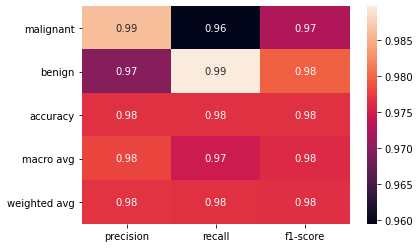

In [55]:
sns.heatmap(pd.DataFrame(heat).iloc[0:3, :].T, annot=True);

In [56]:
print(confusion_matrix(y_test, predictions))

[[71  3]
 [ 1 96]]


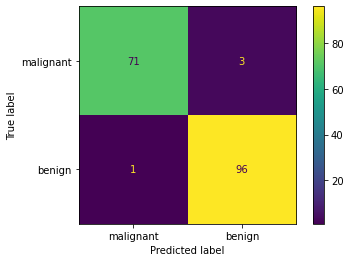

In [57]:
cm = confusion_matrix(y_test, predictions)  #, normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['malignant', 'benign'])
cmd.plot();

# Extra

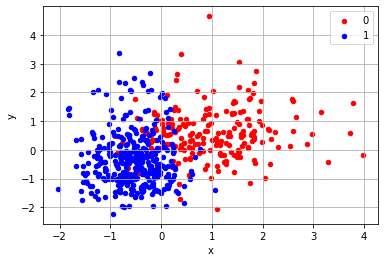

In [59]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# Create dataframe of x, y and label values
dataset_scaled = knn.fit_transform(dataset)
y = df['target']


df = pd.DataFrame(dict(x=dataset_scaled[:,0], y=dataset_scaled[:,1], label=y))

# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.grid(True)
plt.show()  

In [100]:
df.head()

,x,y,label
0,1.097064,-2.073335,0
1,1.829821,-0.353632,0
2,1.579888,0.456187,0
3,-0.768909,0.253732,0
4,1.750297,-1.151816,0


In [104]:
df['y'].min(), df['y'].max()

(-2.229248512170398, 4.651888980771188)